In [1]:
import tensorflow as tf
from tensorflow import keras 

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [2]:
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

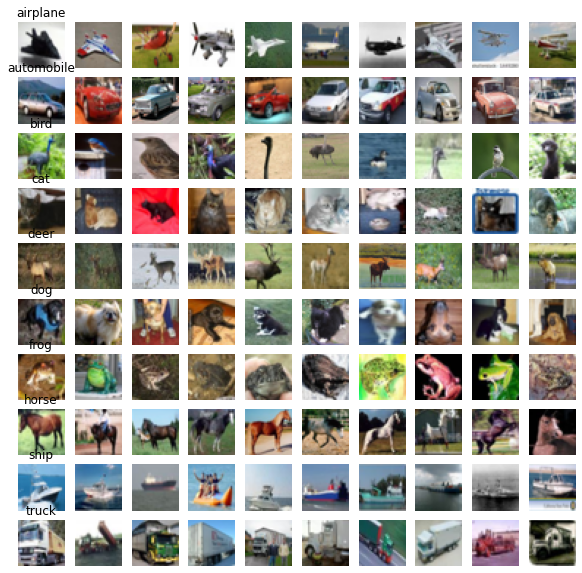

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define the classes to display
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Create an empty grid of 10x10 plots
fig, axs = plt.subplots(10, 10, figsize=(10,10))

# For each class, select 10 random examples and plot them in the corresponding grid cell
for i in range(10):
    examples = x_train[y_train.flatten() == i][:10]
    for j in range(10):
        axs[i, j].imshow(examples[j])
        axs[i, j].axis('off')
        if j == 0:
            axs[i, j].set_title(classes[i])

plt.show()

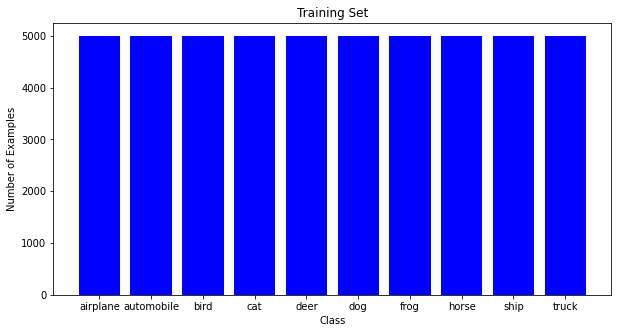

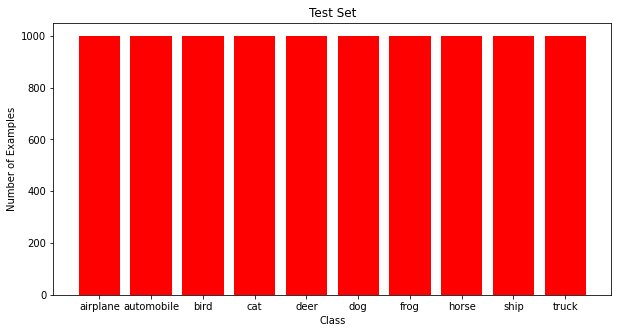

In [4]:
train_counts = np.bincount(y_train.flatten())
test_counts = np.bincount(y_test.flatten())

# Create a bar plot of the number of examples per class in the training set
plt.figure(figsize=(10,5))
plt.bar(classes, train_counts, color='blue')
plt.title('Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Examples')
plt.show()

# Create a bar plot of the number of examples per class in the test set
plt.figure(figsize=(10,5))
plt.bar(classes, test_counts, color='red')
plt.title('Test Set')
plt.xlabel('Class')
plt.ylabel('Number of Examples')
plt.show()

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [7]:
from keras.utils import to_categorical

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert the labels to one-hot vectors
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [9]:
from keras.callbacks import EarlyStopping

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

batch_size = 32
epochs = 50
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9691 - accuracy: 0.6620 - val_loss: 1.0539 - val_accuracy: 0.6372
Epoch 2/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8596 - accuracy: 0.7007 - val_loss: 0.9981 - val_accuracy: 0.6629
Epoch 3/50
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7816 - accuracy: 0.7280 - val_loss: 0.8824 - val_accuracy: 0.6965
Epoch 4/50
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7164 - accuracy: 0.7508 - val_loss: 0.8727 - val_accuracy: 0.7102
Epoch 5/50
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6592 - accuracy: 0.7718 - val_loss: 0.9928 - val_accuracy: 0.6888
Epoch 6/50
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6117 - accuracy: 0.7881 - val_loss: 0.9225 - val_accuracy: 0.7113
Epoch 7/50
1563/1563 [==============================] - 62s 39ms/step - loss: 0.5737 - accuracy: 0.8006 - val_loss: 0.9160 -

In [10]:
# Evaluate the model on the test set
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1433643102645874
Test accuracy: 0.6736000180244446
